__Nama Kelompok :__ 
    1. Risya Novita Ramadhani (180441100004)
    2. Syarifatun Miftahul Rizqi (1804411000)

# DOKUMENTASI PYGAME

__1. PENGERTIAN PYGAME__

    Pygame adalah seperangkat modul Python yang dirancang untuk membuat permainan. Pygame menambahkan fungsi di atas dengan sangat baik di SDL perpustakaan. Hal ini memungkinkan Anda untuk membuat sebuah game dengan fitur yang lengkap dan sebuah program multimedia dalam bahasa python. Pygame sendiri memiliki beberapa keunggulan yakni mudah di mengerti bagi pemula, berlisensi gratis, dan memiliki beberapa komunitas yang dapat membantu dalam belajar.
    
__2. CARA INSTALASI PYGAME__

Cara instalasi di bawah ini dapat kita lakukan untuk bisa menggunakan modul pygame  :
* Buka aplikasi python kali ini saya menggunakan pycharm 
* Klik menu file 
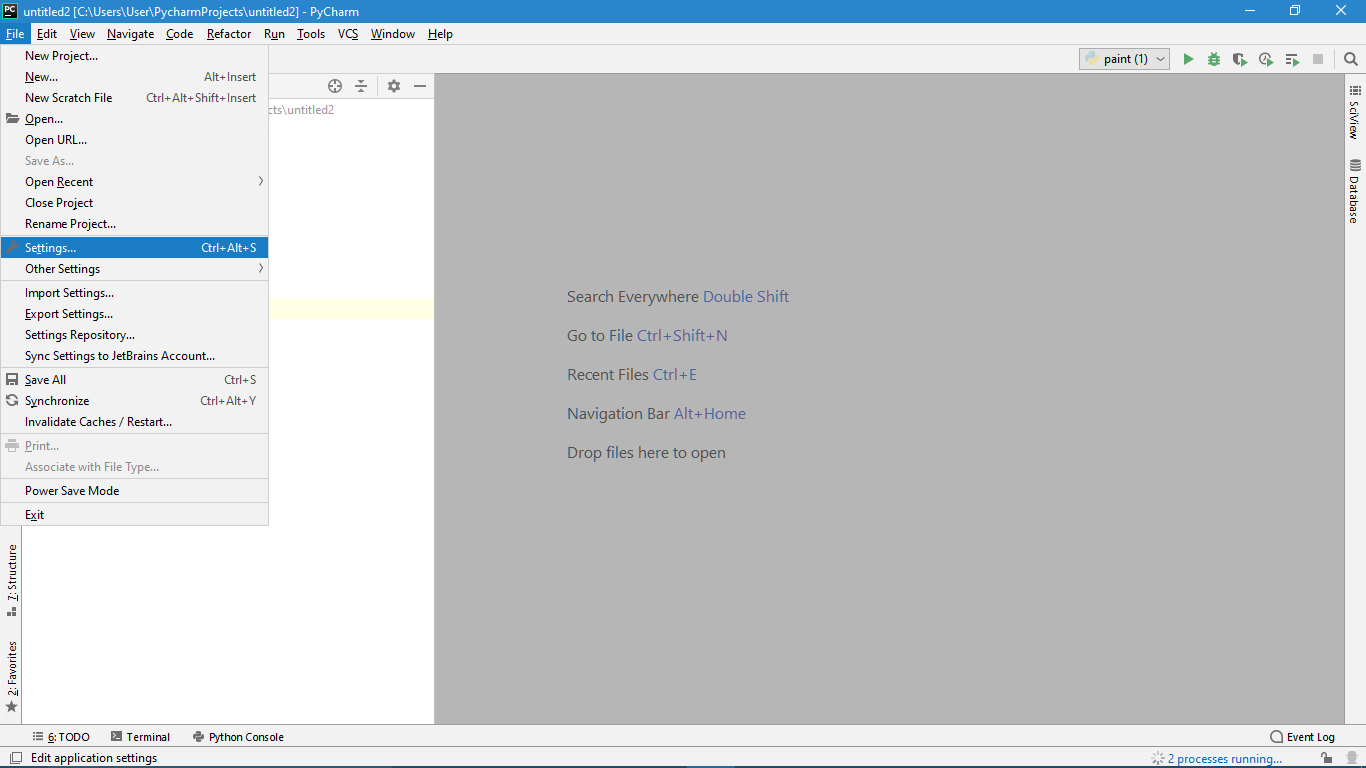
* pilih setting
* Kemudian pilih project , lalu project interpreter 
* Tambah package , lalu ketik pygame
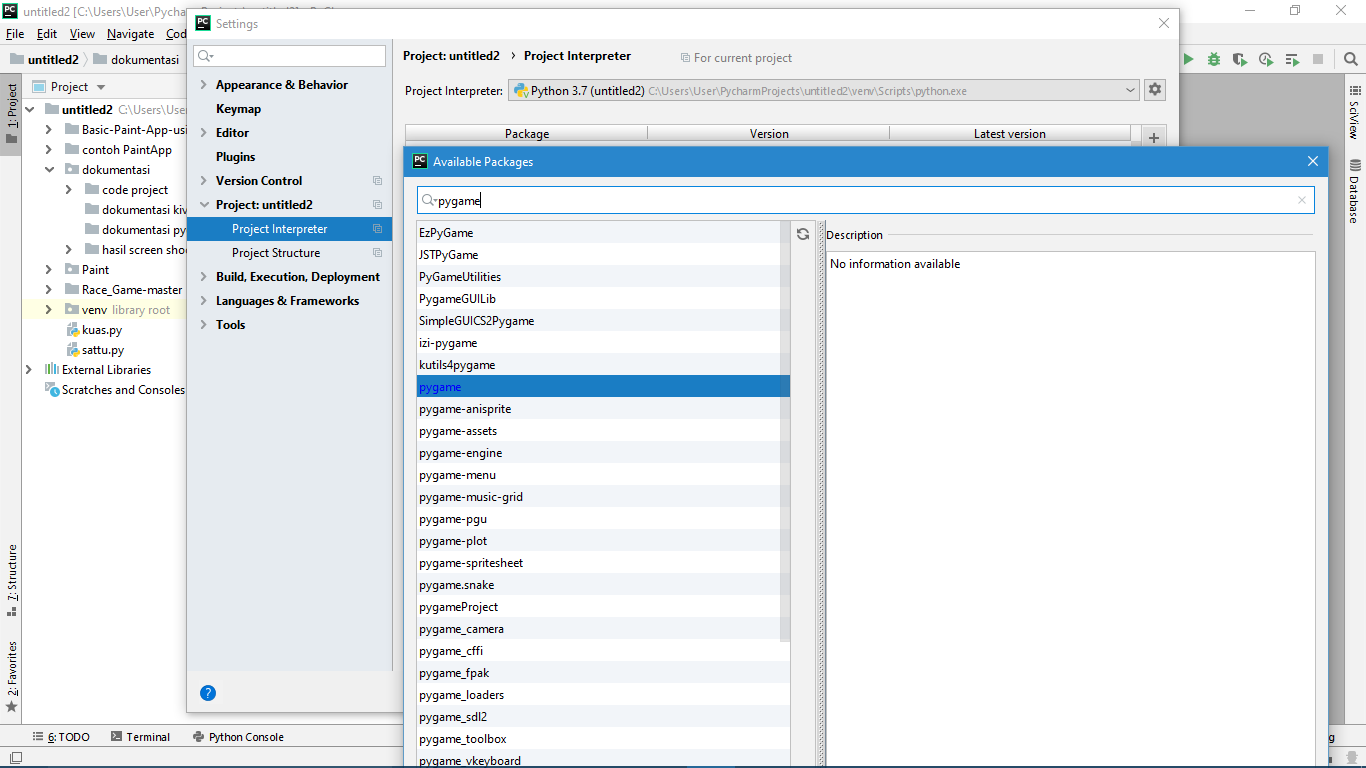
* kemudian install package , jika sudah sukses langsung tekan OK.
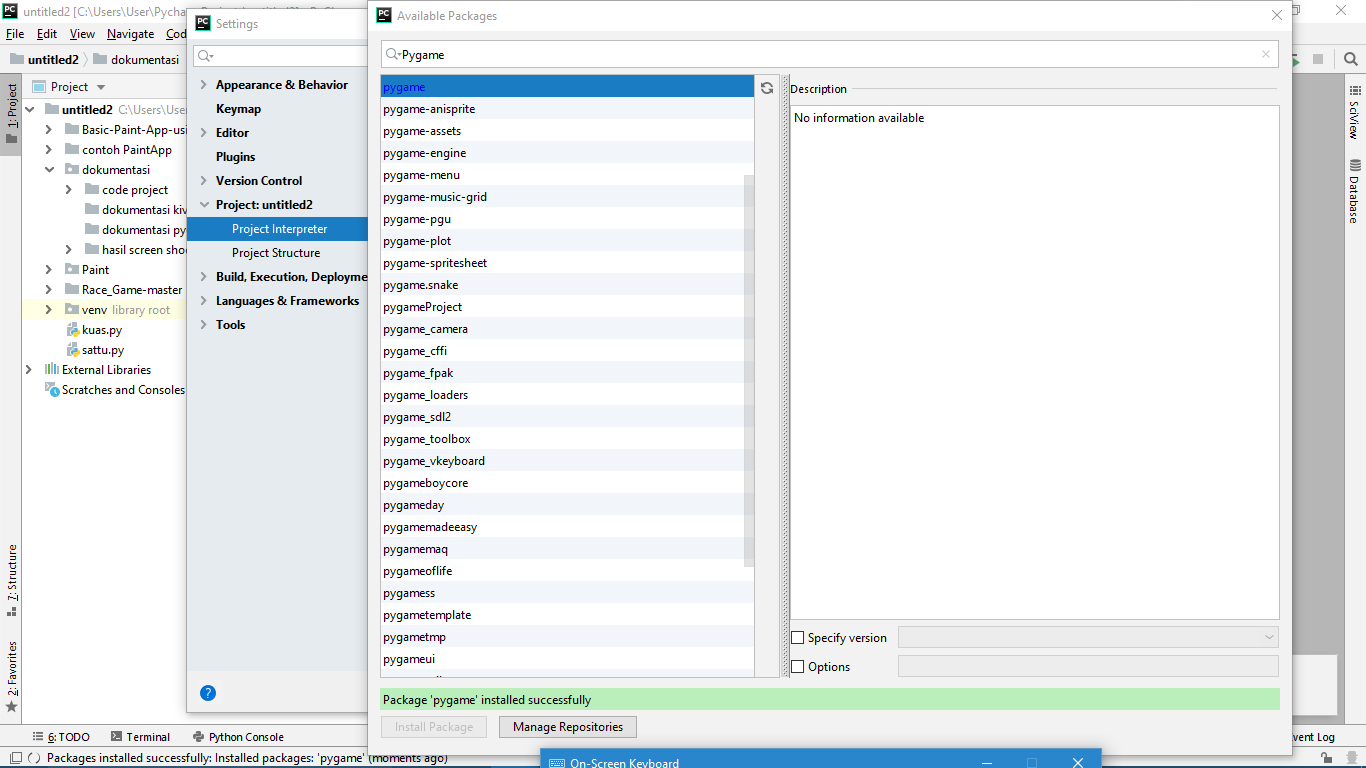
* maka kita bisa langsung menggunakan modul pygame

__3.SOURCE CODE & HASIL PROJECT Pygame__

untuk source codenya :

import pygame, math, sys, time
from pygame.locals import *

def end_game():
    while 1:
        pygame.init()
        screen = pygame.display.set_mode((1024, 700))
        win_font = pygame.font.Font(None, 70)
        win_text = win_font.render('Congratulations! Thanks for Playing!', True, (0,255,0))
        screen.blit(win_text, (60, 384))
        pygame.display.flip()
        for event in pygame.event.get():
            if not hasattr(event, 'key'): continue
            if event.key == K_ESCAPE: sys.exit(0) # quit the game

def level3():
    pygame.init()
    screen = pygame.display.set_mode((1024, 768))
    # GAME CLOCK
    clock = pygame.time.Clock()
    font = pygame.font.Font(None, 75)
    win_condition = None
    pygame.mixer.music.load('My_Life_Be_Like.mp3')
    win_font = pygame.font.Font(None, 50)
    win_condition = None
    win_text = font.render('', True, (0, 255, 0))
    loss_text = font.render('', True, (255, 0, 0))
    t0 = time.time()

    class CarSprite(pygame.sprite.Sprite):
        MAX_FORWARD_SPEED = 10
        MAX_REVERSE_SPEED = 10
        ACCELERATION = 2
        TURN_SPEED = 10

        def __init__(self, image, position):
            pygame.sprite.Sprite.__init__(self)
            self.src_image = pygame.image.load(image)
            self.position = position
            self.speed = self.direction = 0
            self.k_left = self.k_right = self.k_down = self.k_up = 0

        def update(self, deltat):
            # SIMULATION
            self.speed += (self.k_up + self.k_down)
            if self.speed > self.MAX_FORWARD_SPEED:
                self.speed = self.MAX_FORWARD_SPEED
            if self.speed < -self.MAX_REVERSE_SPEED:
                self.speed = -self.MAX_REVERSE_SPEED
            self.direction += (self.k_right + self.k_left)
            x, y = (self.position)
            rad = self.direction * math.pi / 180
            x += -self.speed * math.sin(rad)
            y += -self.speed * math.cos(rad)
            self.position = (x, y)
            self.image = pygame.transform.rotate(self.src_image, self.direction)
            self.rect = self.image.get_rect()
            self.rect.center = self.position

    class PadSprite(pygame.sprite.Sprite):
        normal = pygame.image.load('images/vertical_pads.png')

        def __init__(self, position):
            super(PadSprite, self).__init__()
            self.rect = pygame.Rect(self.normal.get_rect())
            self.rect.center = position
            self.image = self.normal

    class HorizontalPad(pygame.sprite.Sprite):
        normal = pygame.image.load('images/race_pads.png')

        def __init__(self, position):
            super(HorizontalPad, self).__init__()
            self.rect = pygame.Rect(self.normal.get_rect())
            self.rect.center = position
            self.image = self.normal

    class SmallHorizontalPad(pygame.sprite.Sprite):
        normal = pygame.image.load('images/small_horizontal.png')

        def __init__(self, position):
            super(SmallHorizontalPad, self).__init__()
            self.rect = pygame.Rect(self.normal.get_rect())
            self.rect.center = position
            self.image = self.normal

    class SmallVerticalPad(pygame.sprite.Sprite):
        normal = pygame.image.load('images/small_vertical.png')

        def __init__(self, position):
            super(SmallVerticalPad, self).__init__()
            self.rect = pygame.Rect(self.normal.get_rect())
            self.rect.center = position
            self.image = self.normal

            # level design

    pads = [
        SmallVerticalPad((0, 550)),
        SmallVerticalPad((0, 390)),
        SmallVerticalPad((0, 190)),
        SmallVerticalPad((0, 90)),
        SmallVerticalPad((100, -100)),
        SmallVerticalPad((100, 290)),
        SmallVerticalPad((100, 390)),
        SmallVerticalPad((100, 490)),
        SmallVerticalPad((200, 590)),
        SmallVerticalPad((200, 290)),
        SmallVerticalPad((200, 690)),
        SmallVerticalPad((300, 590)),
        SmallVerticalPad((300, 290)),
        SmallVerticalPad((400, 535)),
        SmallVerticalPad((400, 225)),
        SmallVerticalPad((470, 490)),
        SmallVerticalPad((600, 690)),
        SmallVerticalPad((600, 290)),
        SmallVerticalPad((600, 190)),
        SmallVerticalPad((700, 690)),
        SmallVerticalPad((700, 290)),
        SmallVerticalPad((800, 690)),
        SmallVerticalPad((800, 290)),
        SmallVerticalPad((900, -50)),
        SmallVerticalPad((1000, 690)),
        SmallVerticalPad((1000, 290)),
        HorizontalPad((338, 170)),
        HorizontalPad((600, 170))

    ]

    pad_group = pygame.sprite.RenderPlain(*pads)

    class Trophy(pygame.sprite.Sprite):
        def __init__(self, position):
            pygame.sprite.Sprite.__init__(self)
            self.image = pygame.image.load('images/trophy.png')
            self.rect = self.image.get_rect()
            self.rect.x, self.rect.y = position

        def draw(self, screen):
            screen.blit(self.image, self.rect)

    trophies = [Trophy((450, 320))]
    trophy_group = pygame.sprite.RenderPlain(*trophies)

    # CREATE A CAR AND RUN
    rect = screen.get_rect()
    car = CarSprite('images/car.png', (30, 730))
    car_group = pygame.sprite.RenderPlain(car)

    # THE GAME LOOP
    while 1:
        t1 = time.time()
        dt = t1 - t0
        # USER INPUT
        deltat = clock.tick(30)
        for event in pygame.event.get():
            if not hasattr(event, 'key'): continue
            down = event.type == KEYDOWN
            if win_condition == None:
                if event.key == K_RIGHT:
                    car.k_right = down * -5
                elif event.key == K_LEFT:
                    car.k_left = down * 5
                elif event.key == K_UP:
                    car.k_up = down * 2
                elif event.key == K_DOWN:
                    car.k_down = down * -2
                elif event.key == K_ESCAPE:
                    sys.exit(0)  # quit the game
            elif win_condition == True and event.key == K_SPACE:
                end.end_game()
            elif win_condition == False and event.key == K_SPACE:
                level3()
                t0 = t1
            elif event.key == K_ESCAPE:
                sys.exit(0)

            # COUNTDOWN TIMER
        seconds = round((15 - dt), 2)
        if win_condition == None:
            timer_text = font.render(str(seconds), True, (255, 255, 0))
            if seconds <= 0:
                win_condition = False
                timer_text = font.render("Time!", True, (255, 0, 0))
                loss_text = win_font.render('Press Space to Retry', True, (255, 0, 0))

        # RENDERING
        screen.fill((0, 0, 0))
        car_group.update(deltat)
        collisions = pygame.sprite.groupcollide(car_group, pad_group, False, False, collided=None)
        if collisions != {}:
            win_condition = False
            timer_text = font.render("Crash!", True, (255, 0, 0))
            car.image = pygame.image.load('images/collision.png')
            loss_text = win_font.render('Press Space to Retry', True, (255, 0, 0))
            seconds = 0
            car.MAX_FORWARD_SPEED = 0
            car.MAX_REVERSE_SPEED = 0
            car.k_right = 0
            car.k_left = 0

        trophy_collision = pygame.sprite.groupcollide(car_group, trophy_group, False, True)
        if trophy_collision != {}:
            seconds = seconds
            timer_text = font.render("Finished!", True, (0, 255, 0))
            win_condition = True
            car.MAX_FORWARD_SPEED = 0
            car.MAX_REVERSE_SPEED = 0
            pygame.mixer.music.play(loops=0, start=0.0)
            win_text = win_font.render('Press Space to Advance', True, (0, 255, 0))
            if win_condition == True:
                car.k_right = -5

        pad_group.draw(screen)
        car_group.draw(screen)
        trophy_group.draw(screen)
        # Counter Render
        screen.blit(timer_text, (20, 20))
        screen.blit(win_text, (250, 700))
        screen.blit(loss_text, (250, 700))
        pygame.display.flip()




def level2():
    pygame.init()
    screen = pygame.display.set_mode((1024, 768))
    # GAME CLOCK
    clock = pygame.time.Clock()
    font = pygame.font.Font(None, 75)
    win_condition = None
    pygame.mixer.music.load('My_Life_Be_Like.mp3')
    win_font = pygame.font.Font(None, 50)
    win_condition = None
    win_text = font.render('', True, (0, 255, 0))
    loss_text = font.render('', True, (255, 0, 0))
    t0 = time.time()

    class CarSprite(pygame.sprite.Sprite):
        MAX_FORWARD_SPEED = 10
        MAX_REVERSE_SPEED = 10
        ACCELERATION = 2
        TURN_SPEED = 10

        def __init__(self, image, position):
            pygame.sprite.Sprite.__init__(self)
            self.src_image = pygame.image.load(image)
            self.position = position
            self.speed = self.direction = 0
            self.k_left = self.k_right = self.k_down = self.k_up = 0

        def update(self, deltat):
            # SIMULATION
            self.speed += (self.k_up + self.k_down)
            if self.speed > self.MAX_FORWARD_SPEED:
                self.speed = self.MAX_FORWARD_SPEED
            if self.speed < -self.MAX_REVERSE_SPEED:
                self.speed = -self.MAX_REVERSE_SPEED
            self.direction += (self.k_right + self.k_left)
            x, y = (self.position)
            rad = self.direction * math.pi / 180
            x += -self.speed * math.sin(rad)
            y += -self.speed * math.cos(rad)
            self.position = (x, y)
            self.image = pygame.transform.rotate(self.src_image, self.direction)
            self.rect = self.image.get_rect()
            self.rect.center = self.position

    class PadSprite(pygame.sprite.Sprite):
        normal = pygame.image.load('images/vertical_pads.png')

        def __init__(self, position):
            super(PadSprite, self).__init__()
            self.rect = pygame.Rect(self.normal.get_rect())
            self.rect.center = position
            self.image = self.normal

    class HorizontalPad(pygame.sprite.Sprite):
        normal = pygame.image.load('images/race_pads.png')

        def __init__(self, position):
            super(HorizontalPad, self).__init__()
            self.rect = pygame.Rect(self.normal.get_rect())
            self.rect.center = position
            self.image = self.normal

    class SmallHorizontalPad(pygame.sprite.Sprite):
        normal = pygame.image.load('images/small_horizontal.png')

        def __init__(self, position):
            super(SmallHorizontalPad, self).__init__()
            self.rect = pygame.Rect(self.normal.get_rect())
            self.rect.center = position
            self.image = self.normal

    class SmallVerticalPad(pygame.sprite.Sprite):
        normal = pygame.image.load('images/small_vertical.png')

        def __init__(self, position):
            super(SmallVerticalPad, self).__init__()
            self.rect = pygame.Rect(self.normal.get_rect())
            self.rect.center = position
            self.image = self.normal

            # level design

    pads = [
        PadSprite((0, 200)),
        PadSprite((0, 400)),
        HorizontalPad((60, 0)),
        HorizontalPad((300, 0)),
        HorizontalPad((700, 0)),
        HorizontalPad((900, 0)),
        PadSprite((1024, 100)),
        PadSprite((1024, 550)),
        HorizontalPad((1024, 768)),
        HorizontalPad((624, 768)),
        HorizontalPad((224, 768)),
        PadSprite((200, 768)),
        PadSprite((200, 368)),
        HorizontalPad((450, 130)),
        HorizontalPad((550, 130)),
        PadSprite((800, 375)),
        SmallHorizontalPad((670, 615)),
        SmallHorizontalPad((470, 615)),
        SmallVerticalPad((350, 490)),
        SmallVerticalPad((350, 390)),
        SmallHorizontalPad((470, 270)),
        SmallVerticalPad((600, 390))
        # PadSprite((200, 368))

    ]
    pad_group = pygame.sprite.RenderPlain(*pads)

    class Trophy(pygame.sprite.Sprite):
        def __init__(self, position):
            pygame.sprite.Sprite.__init__(self)
            self.image = pygame.image.load('images/trophy.png')
            self.rect = self.image.get_rect()
            self.rect.x, self.rect.y = position

        def draw(self, screen):
            screen.blit(self.image, self.rect)

    trophies = [Trophy((450, 320))]
    trophy_group = pygame.sprite.RenderPlain(*trophies)

    # CREATE A CAR AND RUN
    rect = screen.get_rect()
    car = CarSprite('images/car.png', (30, 730))
    car_group = pygame.sprite.RenderPlain(car)

    # THE GAME LOOP
    while 1:
        t1 = time.time()
        dt = t1 - t0
        # USER INPUT
        deltat = clock.tick(30)
        for event in pygame.event.get():
            if not hasattr(event, 'key'): continue
            down = event.type == KEYDOWN
            if win_condition == None:
                if event.key == K_RIGHT:
                    car.k_right = down * -5
                elif event.key == K_LEFT:
                    car.k_left = down * 5
                elif event.key == K_UP:
                    car.k_up = down * 2
                elif event.key == K_DOWN:
                    car.k_down = down * -2
                elif event.key == K_ESCAPE:
                    sys.exit(0)  # quit the game
            elif win_condition == True and event.key == K_SPACE:
                level3()
            elif win_condition == False and event.key == K_SPACE:
                level2()
                t0 = t1
            elif event.key == K_ESCAPE:
                sys.exit(0)

            # COUNTDOWN TIMER
        seconds = round((20 - dt), 2)
        if win_condition == None:
            timer_text = font.render(str(seconds), True, (255, 255, 0))
            if seconds <= 0:
                win_condition = False
                timer_text = font.render("Time!", True, (255, 0, 0))
                loss_text = win_font.render('Press Space to Retry', True, (255, 0, 0))

        # RENDERING
        screen.fill((0, 0, 0))
        car_group.update(deltat)
        collisions = pygame.sprite.groupcollide(car_group, pad_group, False, False, collided=None)
        if collisions != {}:
            win_condition = False
            timer_text = font.render("Crash!", True, (255, 0, 0))
            car.image = pygame.image.load('images/collision.png')
            loss_text = win_font.render('Press Space to Retry', True, (255, 0, 0))
            seconds = 0
            car.MAX_FORWARD_SPEED = 0
            car.MAX_REVERSE_SPEED = 0
            car.k_right = 0
            car.k_left = 0

        trophy_collision = pygame.sprite.groupcollide(car_group, trophy_group, False, True)
        if trophy_collision != {}:
            seconds = seconds
            timer_text = font.render("Finished!", True, (0, 255, 0))
            win_condition = True
            car.MAX_FORWARD_SPEED = 0
            car.MAX_REVERSE_SPEED = 0
            pygame.mixer.music.play(loops=0, start=0.0)
            win_text = win_font.render('Press Space to Advance', True, (0, 255, 0))
            if win_condition == True:
                car.k_right = -5

        pad_group.draw(screen)
        car_group.draw(screen)
        trophy_group.draw(screen)
        # Counter Render
        screen.blit(timer_text, (20, 20))
        screen.blit(win_text, (250, 700))
        screen.blit(loss_text, (250, 700))
        pygame.display.flip()


def level1():
    pygame.init()
    screen = pygame.display.set_mode((1024, 768))
    # GAME CLOCK
    clock = pygame.time.Clock()
    font = pygame.font.Font(None, 75)
    win_font = pygame.font.Font(None, 50)
    win_condition = None
    win_text = font.render('', True, (0, 255, 0))
    loss_text = font.render('', True, (255, 0, 0))
    pygame.mixer.music.load('My_Life_Be_Like.mp3')
    t0 = time.time()

    class CarSprite(pygame.sprite.Sprite):
        MAX_FORWARD_SPEED = 10
        MAX_REVERSE_SPEED = 10
        ACCELERATION = 2
        TURN_SPEED = 10

        def __init__(self, image, position):
            pygame.sprite.Sprite.__init__(self)
            self.src_image = pygame.image.load(image)
            self.position = position
            self.speed = self.direction = 0
            self.k_left = self.k_right = self.k_down = self.k_up = 0

        def update(self, deltat):
            # SIMULATION
            self.speed += (self.k_up + self.k_down)
            if self.speed > self.MAX_FORWARD_SPEED:
                self.speed = self.MAX_FORWARD_SPEED
            if self.speed < -self.MAX_REVERSE_SPEED:
                self.speed = -self.MAX_REVERSE_SPEED
            self.direction += (self.k_right + self.k_left)
            x, y = (self.position)
            rad = self.direction * math.pi / 180
            x += -self.speed * math.sin(rad)
            y += -self.speed * math.cos(rad)
            self.position = (x, y)
            self.image = pygame.transform.rotate(self.src_image, self.direction)
            self.rect = self.image.get_rect()
            self.rect.center = self.position

    class Verticalpad(pygame.sprite.Sprite):
        normal = pygame.image.load('images/vertical_pads.png')

        def __init__(self, position):
            super(Verticalpad, self).__init__()
            self.rect = pygame.Rect(self.normal.get_rect())
            self.rect.center = position
            self.image = self.normal

    class PadSprite(pygame.sprite.Sprite):
        normal = pygame.image.load('images/race_pads.png')
        hit = pygame.image.load('images/collision.png')

        def __init__(self, position):
            super(PadSprite, self).__init__()
            self.rect = pygame.Rect(self.normal.get_rect())
            self.rect.center = position

        def update(self, hit_list):
            if self in hit_list:
                self.image = self.hit
            else:
                self.image = self.normal

    pads = [
        Verticalpad((0, 200)),
        Verticalpad((0, 400)),
        Verticalpad((1024, 100)),
        Verticalpad((1024, 550)),
        PadSprite((0, 10)),
        PadSprite((600, 10)),
        PadSprite((1100, 10)),
        PadSprite((100, 150)),
        PadSprite((600, 150)),
        PadSprite((100, 300)),
        PadSprite((800, 300)),
        PadSprite((400, 450)),
        PadSprite((700, 450)),
        PadSprite((200, 600)),
        PadSprite((900, 600)),
        PadSprite((400, 750)),
        PadSprite((800, 750)),
    ]
    pad_group = pygame.sprite.RenderPlain(*pads)

    class Trophy(pygame.sprite.Sprite):
        def __init__(self, position):
            pygame.sprite.Sprite.__init__(self)
            self.image = pygame.image.load('images/trophy.png')
            self.rect = self.image.get_rect()
            self.rect.x, self.rect.y = position

        def draw(self, screen):
            screen.blit(self.image, self.rect)

    trophies = [Trophy((285, 0))]
    trophy_group = pygame.sprite.RenderPlain(*trophies)

    # CREATE A CAR AND RUN
    rect = screen.get_rect()
    car = CarSprite('images/car.png', (10, 730))
    car_group = pygame.sprite.RenderPlain(car)

    # THE GAME LOOP
    while 1:
        # USER INPUT
        t1 = time.time()
        dt = t1 - t0

        deltat = clock.tick(30)
        for event in pygame.event.get():
            if not hasattr(event, 'key'): continue
            down = event.type == KEYDOWN
            if win_condition == None:
                if event.key == K_RIGHT:
                    car.k_right = down * -5
                elif event.key == K_LEFT:
                    car.k_left = down * 5
                elif event.key == K_UP:
                    car.k_up = down * 2
                elif event.key == K_DOWN:
                    car.k_down = down * -2
                elif event.key == K_ESCAPE:
                    sys.exit(0)  # quit the game
            elif win_condition == True and event.key == K_SPACE:
                level2.level2()
            elif win_condition == False and event.key == K_SPACE:
                level1()
                t0 = t1
            elif event.key == K_ESCAPE:
                sys.exit(0)

            # COUNTDOWN TIMER
        seconds = round((20 - dt), 2)
        if win_condition == None:
            timer_text = font.render(str(seconds), True, (255, 255, 0))
            if seconds <= 0:
                win_condition = False
                timer_text = font.render("Time!", True, (255, 0, 0))
                loss_text = win_font.render('Press Space to Retry', True, (255, 0, 0))

        # RENDERING
        screen.fill((0, 0, 0))
        car_group.update(deltat)
        collisions = pygame.sprite.groupcollide(car_group, pad_group, False, False, collided=None)
        if collisions != {}:
            win_condition = False
            timer_text = font.render("Crash!", True, (255, 0, 0))
            car.image = pygame.image.load('images/collision.png')
            loss_text = win_font.render('Press Space to Retry', True, (255, 0, 0))
            seconds = 0
            car.MAX_FORWARD_SPEED = 0
            car.MAX_REVERSE_SPEED = 0
            car.k_right = 0
            car.k_left = 0

        trophy_collision = pygame.sprite.groupcollide(car_group, trophy_group, False, True)
        if trophy_collision != {}:
            seconds = seconds
            timer_text = font.render("Finished!", True, (0, 255, 0))
            win_condition = True
            car.MAX_FORWARD_SPEED = 0
            car.MAX_REVERSE_SPEED = 0
            pygame.mixer.music.play(loops=0, start=0.0)
            win_text = win_font.render('Press Space to Advance', True, (0, 255, 0))
            if win_condition == True:
                car.k_right = -5

        pad_group.update(collisions)
        pad_group.draw(screen)
        car_group.draw(screen)
        trophy_group.draw(screen)
        # Counter Render
        screen.blit(timer_text, (20, 60))
        screen.blit(win_text, (250, 700))
        screen.blit(loss_text, (250, 700))
        pygame.display.flip()


pygame.init()
screen = pygame.display.set_mode((1024, 768))
while 1:
    screen.fill((0,0,0))
    for event in pygame.event.get():
                if not hasattr(event, 'key'): continue
                if event.key == K_SPACE:
                    level1()
                elif event.key == K_ESCAPE: sys.exit(0)
    img = pygame.image.load("images/main_menu_image.png")
    screen.blit(img,(0,0))
    pygame.display.flip()
    
 * Hasil Programnya :  
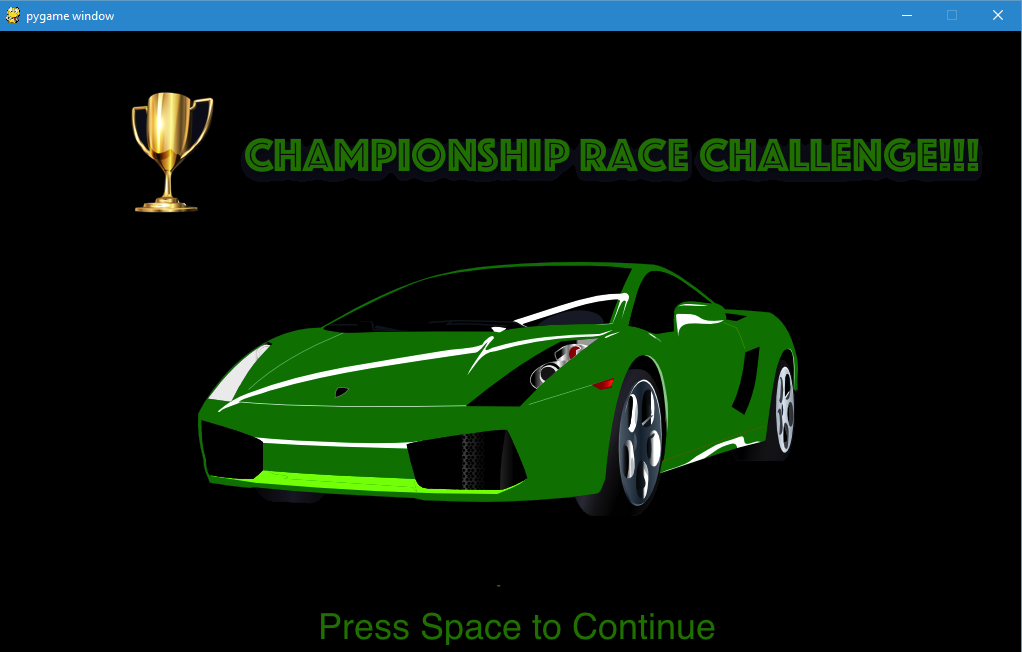
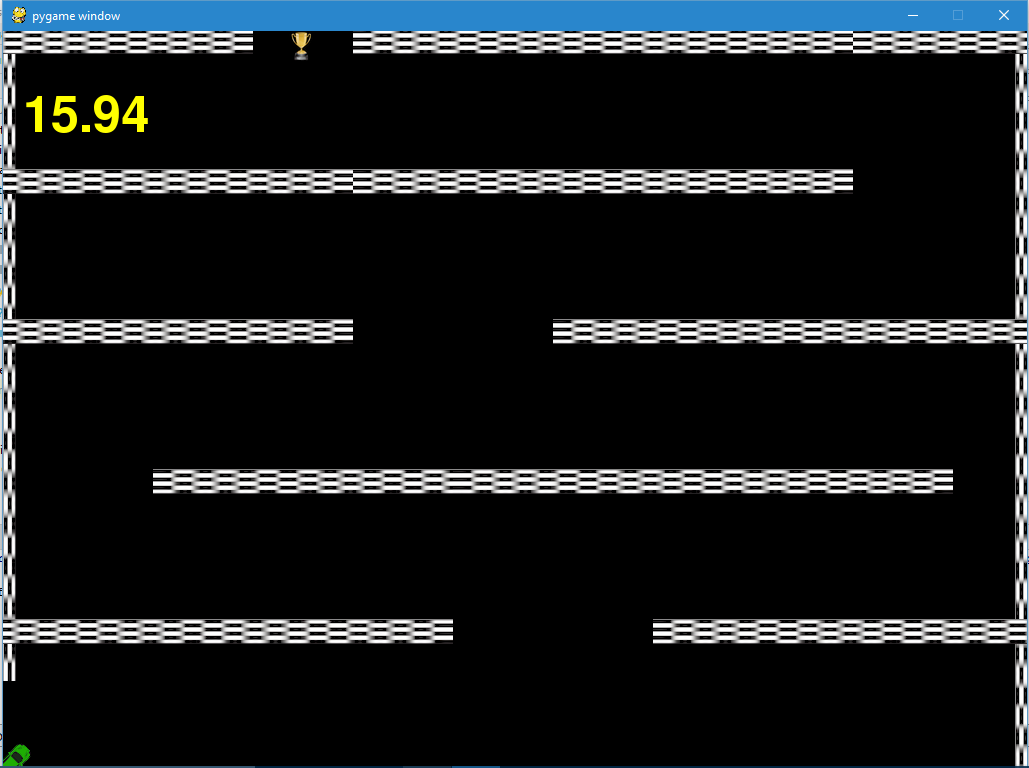


__4. STRUKTUR CLASS PYGAME & PENJELASANNYA__

__Race Game Car__
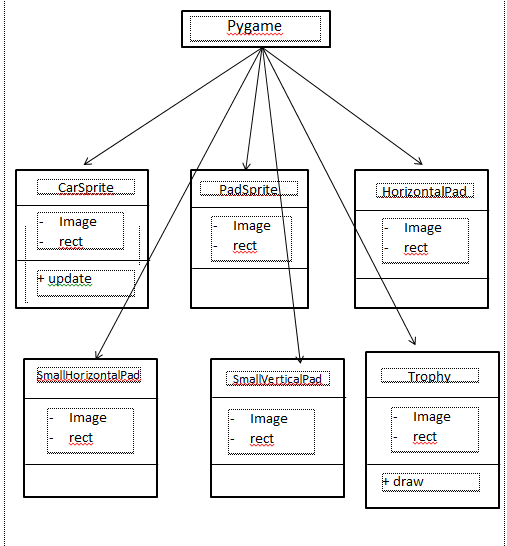
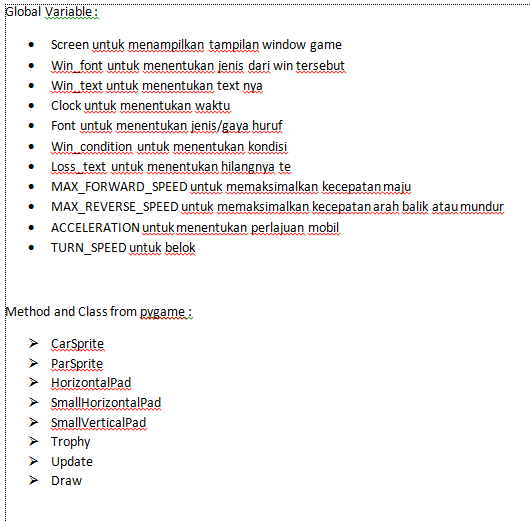
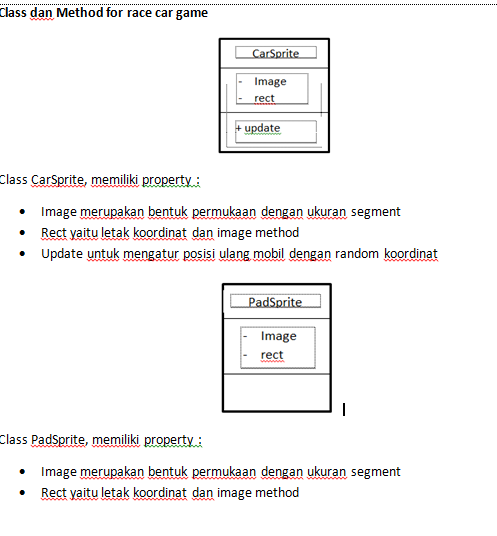
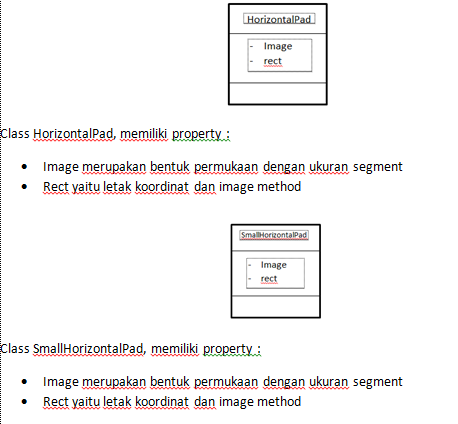
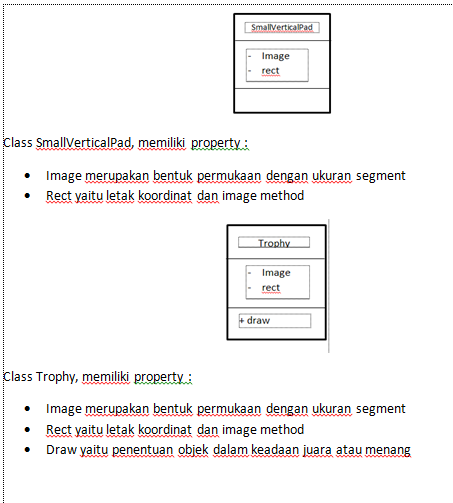
__5. IMPLEMENTASI MATERI OOP PADA PROJECT PYGAME__


    Class merupakan blueprint dari object. class digunakan hanya untuk membuat kerangka dasar yang akan kita pakai nantinya adalah hasil cetakan dari class yakni object. sedangkan properti adalah data yang terdapat dalam sebuah class. Method adalah tindakan yang bisa dilakukan didalam class, method pada dasarnya adalah function. sedangkan object sendiri adalah hasil cetak dari class, atau hasil konkrit dari class.
    untuk program pygame kali ini menggunakan konsep inheritance atau turunan dari class - class sebelumnya, tipe inheritancenya overriding .

  